# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.__version__

'1.4.2'

In [4]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [5]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [6]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [7]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [8]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [9]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [10]:
len(movies)

244914

### List all Batman movies ever made

In [11]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [12]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [13]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [14]:
hp = movies[movies['title'].str.contains('Harry Potter', case = False)]

print('All Harry Potter movies from the most recent to the earliest :')
hp.sort_values("year",ascending=False)

All Harry Potter movies from the most recent to the earliest :


,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [15]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [16]:
print('Movies made in the year 2015 :' ,len(movies[movies['year']==2015]))

Movies made in the year 2015 : 8702


### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [17]:
yr = list(range(2000,2018))
cond = movies['year'].isin(yr)

#movies[cond].sort_values('year')

print('Movies made from 2000 till 2018 :' ,len(movies[cond]))

Movies made from 2000 till 2018 : 106029


### Section I - Q4: How many movies are titled "Hamlet"?

In [128]:
hamlet = movies[movies.title == 'Hamlet']

#hamlet = movies[movies['title'].str.contains('Hamlet', case = False)]

hamlet

,title,year,decade
1931,Hamlet,2009,2000
8214,Hamlet,1976,1970
46344,Hamlet,1921,1920
55639,Hamlet,2000,2000
73869,Hamlet,1948,1940
98326,Hamlet,1990,1990
118535,Hamlet,1913,1910
124506,Hamlet,1911,1910
140203,Hamlet,1954,1950
155004,Hamlet,1964,1960


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [19]:
print('All movies titled Hamlet released on or after 2000, from earliest to most recent:' )

hamlet[hamlet['year']>= 2000].sort_values('year')

All movies titled Hamlet released on or after 2000, from earliest to most recent:


,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [20]:
inception_df = cast[cast['title']== 'Inception']
print("No. of supporting cast :" , inception_df['n'].isna().sum())

No. of supporting cast : 27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [21]:
print("No. of main cast :" , inception_df['n'].notna().sum())

No. of main cast : 51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [22]:
print("Show the top ten cast (actors/actresses) in the movie: Inception")
inception_df.dropna().sort_values('n').iloc[:10]

Show the top ten cast (actors/actresses) in the movie: Inception


,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [23]:
# (A)

albus_d = cast[cast['character'].str.contains('Albus Dumbledore', case = False)]
albus_d

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792419,Harry Potter and the Deathly Hallows: Part 1,2010,Michael Gambon,actor,Professor Albus Dumbledore,39.0
792420,Harry Potter and the Deathly Hallows: Part 2,2011,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792422,Harry Potter and the Half-Blood Prince,2009,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN


In [24]:
#(B)

unique_albus_d = albus_d.drop_duplicates(subset = 'name')
print("The actors who played the character 'Albus Dumbledore': \n", unique_albus_d['name'])

The actors who played the character 'Albus Dumbledore': 
 704984            Dane Farwell
792419          Michael Gambon
947789          Richard Harris
1685537    George (X) O'Connor
1893421             Toby Regbo
2248085      Timothy Tedmanson
Name: name, dtype: object


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [25]:
#(A)How many roles has 'Keanu Reeves' played throughout his career?

keanu_r = cast[cast['name'].str.contains('Keanu Reeves', case = False)]
print('No. of roles plated by Keanu Reeves :', len(keanu_r.name))

No. of roles plated by Keanu Reeves : 62


In [26]:
#(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

keanu_lead = keanu_r.dropna(subset='n')
keanu_lead[(keanu_lead['year']>=1999) & (keanu_lead['n']==1.0)].sort_values('year')


,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [27]:
#(A)List the total number of actor and actress roles available from 1950 - 1960

yr = list(range (1950,1961))

cond = cast['year'].isin(yr)
cast[cond].groupby('type')['n'].sum()


type
actor      867715.0
actress    333306.0
Name: n, dtype: float64

In [28]:
# (B)List the total number of actor and actress roles available from 2007 - 2017

yr = list(range (2007,2018))

cond = cast['year'].isin(yr)
cast[cond].groupby('type')['n'].sum()

type
actor      9637314.0
actress    5754008.0
Name: n, dtype: float64

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [32]:
# (A) List the total number of leading roles available from 2000 to present

import datetime

today = datetime.date.today()
current_yr = today.year
yr = list(range (2020,current_yr+1))

lead_role = cast[(cast['year'].isin(yr)) & (cast['n']==1.0)]  # assuming leading role has n = 1.0

print('total number of leading roles available from 2000 to present :',len(lead_role))
lead_role

total number of leading roles available from 2000 to present : 4


,title,year,name,type,character,n
594544,Infinite Payback,2020,Aaron Dill,actor,Dark,1.0
594545,Infinite Payback,2020,Aaron Dill,actor,Nathen,1.0
594546,Infinite Payback,2020,Aaron Dill,actor,Random Guy,1.0
2135010,Astronomy Walkers,2020,Aaron Smolinski,actor,Anthony Speranza,1.0


In [33]:
#(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

nonlead_role = cast[(cast['year'].isin(yr)) & (cast['n'] != 1.0)].dropna(subset = 'n')

print('Total number of non-leading roles available from 2000 to present :',len(nonlead_role))
nonlead_role

Total number of non-leading roles available from 2000 to present : 4


,title,year,name,type,character,n
616796,Astronomy Walkers,2020,Shawn Doucette,actor,Clarence,6.0
773457,Astronomy Walkers,2020,Troy Fromin,actor,Francis,5.0
2641034,Astronomy Walkers,2020,Melantha Blackthorne,actress,Spirit Guide,2.0
3720921,Astronomy Walkers,2020,Alyssa (II) Ward,actress,Melissa,9.0


In [34]:
#(C) List the total number of support\extra-credit roles available from 2000 - present

extra_role = cast[cast['year'].isin(yr)]['n'].isna().sum()
print('Total number of support\extra-credit roles available from 2000 - present :' , extra_role)


Total number of support\extra-credit roles available from 2000 - present : 235


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [35]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

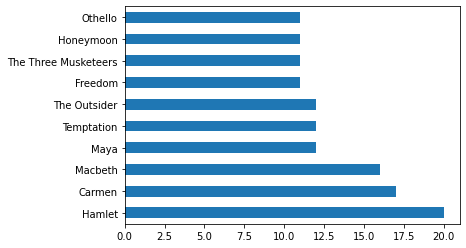

In [36]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [37]:
yrs = movies['year'].value_counts()[:3]
yrs

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [43]:
movies['decade'] = movies['year']-(movies['year']%10)

film_per_decade = movies['decade'].value_counts().sort_values(ascending = False)

film_per_decade

2010    75733
2000    39452
1990    22992
1980    21034
1970    19526
1960    17976
1950    12934
1930    10388
1920     9034
1940     8718
1910     6799
2020      285
1900       39
1890        3
2110        1
Name: decade, dtype: int64

<AxesSubplot:>

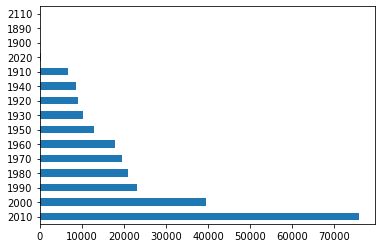

In [44]:
film_per_decade.plot(kind='barh')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [49]:
# (A) What are the top 10 most common character names in movie history?

character_name = cast['character'].value_counts()[:10]
character_name

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [63]:
# (B) Who are the top 10 people most often credited as "Herself" in movie history?

#herself_topten = cast[cast['character'] == 'Herself']['name'].value_counts()[:10]

herself_topten = cast[cast['character'].str.contains('Herself', case = False)]['name'].value_counts()[:10]
herself_topten

Queen Elizabeth II                  18
Jacqueline Kennedy                  12
Margaret Thatcher                   10
Joyce Brothers                      10
Hillary Clinton                      9
Mar?a Luisa (V) Mart?n               9
Luisa Horga                          9
Pat Nixon                            8
Caroline Kennedy                     7
Queen Elizabeth the Queen Mother     7
Name: name, dtype: int64

In [66]:
#(C) Who are the top 10 people most often credited as "Himself" in movie history?

himself_topten = cast[cast['character'].str.contains('Himself', case = False)]['name'].value_counts()[:10]
himself_topten

Adolf Hitler             115
Richard Nixon             54
John F. Kennedy           49
Ronald Reagan             46
George W. Bush            28
Winston Churchill         28
Martin Luther King        26
Benito Mussolini          26
Franklin D. Roosevelt     25
Bill Clinton              23
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [74]:
# A) What are the top 10 most frequent roles that start with the word "Zombie"?

zombie_topten = cast[cast['character'].str.startswith('Zombie', na= False)]['character'].value_counts()[:10]
zombie_topten

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [76]:
#(B) What are the top 10 most frequent roles that start with the word "Police"?

police_topten = cast[cast['character'].str.startswith('Police', na = False)]['character'].value_counts()[:10]
police_topten

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

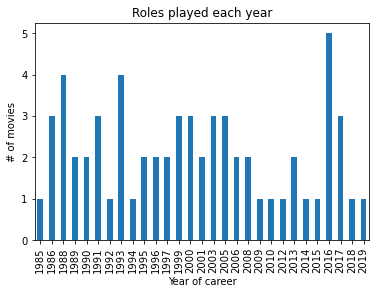

In [121]:
keanu_role_year = keanu_r.value_counts('year',sort=False)
keanu_role_year.plot(kind='bar' , title = 'Roles played each year' , xlabel = 'Year of career' , ylabel ='# of movies')

plt.show()

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:title={'center':'n-value each year'}, xlabel='Year of career', ylabel='n-value'>

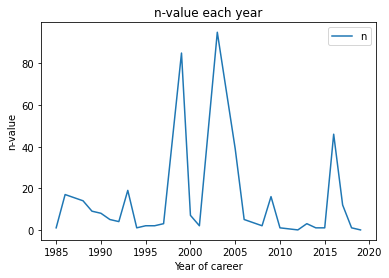

In [125]:
keanu_n_year = keanu_r.groupby('year').sum()
keanu_n_year.plot(kind='line' , title = 'n-value each year' , xlabel = 'Year of career' , ylabel ='n-value')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

<AxesSubplot:title={'center':'Hamlet made each decade'}, xlabel='Decade', ylabel='# of movies'>

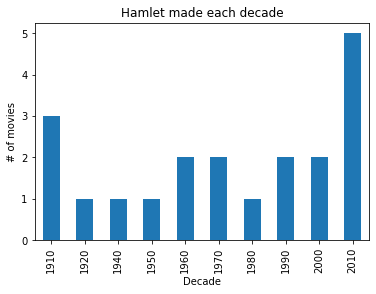

In [134]:

hamlet_decade = hamlet.value_counts('decade',sort=False)
hamlet_decade.plot(kind='bar' , title = 'Hamlet made each decade' , xlabel = 'Decade' , ylabel ='# of movies')


### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [139]:
#(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

yr = list(range(1960,1970))

lead_role_both = cast[(cast['year'].isin(yr)) & (cast['n']==1.0)]  # assuming leading role has n = 1.0

print('Total number of leading roles available to both actors and actresses, in the 1960s  :',len(lead_role_both))
lead_role_both

total number of leading roles available to both actors and actresses, in the 1960s  : 11823


,title,year,name,type,character,n
1087,Batman Fights Dracula,1967,Jing Abalos,actor,Batman,1.0
1088,Batman Fights Dracula,1967,Jing Abalos,actor,Bruce Wayne,1.0
1092,Mighty Rock,1969,Jing Abalos,actor,Mighty Rock,1.0
1192,Didi mtsvane veli,1967,Dodo Abashidze,actor,Sosana,1.0
1208,Sinatle chvens panjrebshi,1969,Dodo Abashidze,actor,Aleqsandre,1.0
...,...,...,...,...,...,...
3783433,Le lit de la vierge,1969,Zouzou,actress,Marie,1.0
3783434,Le lit de la vierge,1969,Zouzou,actress,Marie Magdal?ne,1.0
3783545,A hierro muere,1962,Olga Zubarry,actress,Elisa,1.0
3785382,Anego,1969,Hiroko ?gi,actress,Ai Konno,1.0


In [140]:
#(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

yr = list(range(2000,2010))

lead_role_both_2000 = cast[(cast['year'].isin(yr)) & (cast['n']==1.0)]  # assuming leading role has n = 1.0

print('Total number of leading roles available to both actors and actresses, in the 1960s  :',len(lead_role_both_2000))
lead_role_both_2000

Total number of leading roles available to both actors and actresses, in the 1960s  : 26344


,title,year,name,type,character,n
102,Live Freaky Die Freaky,2006,Nick 13,actor,TV Reporter #1,1.0
145,Get Rich or Die Tryin',2005,50 Cent,actor,Marcus,1.0
329,Eeram,2009,Aadhi,actor,Vasudevan,1.0
332,Mirugam,2007,Aadhi,actor,Ayyanar,1.0
672,Crazy Jones,2002,Joe Aaron,actor,Finnegan Jones,1.0
...,...,...,...,...,...,...
3785614,Doraemon: Nobita to fushigi kazetsukai,2003,Nobuyo ?yama,actress,Doraemon,1.0
3785617,Doraemon: Nobita to robotto kingudamu,2002,Nobuyo ?yama,actress,Doraemon,1.0
3785749,Ich hiess Sabina Spielrein,2002,Eva ?sterberg,actress,Sabina Spielrein,1.0
3785795,120,2008,?zge ?zberk,actress,M?nire,1.0


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [190]:
frank_oz = cast[cast['name']== 'Frank Oz'].groupby(['year','title']).size()

print("List, in order by year, each of the films in which Frank Oz has played more than 1 role :")
frank_oz[frank_oz > 1]


List, in order by year, each of the films in which Frank Oz has played more than 1 role :


year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [191]:
frank_oz_char = cast[cast['name']== 'Frank Oz'].groupby(['character']).size()

print("List each of the characters that Frank Oz has portrayed at least twice :")
frank_oz_char[frank_oz_char >= 2]


List each of the characters that Frank Oz has portrayed at least twice :


character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

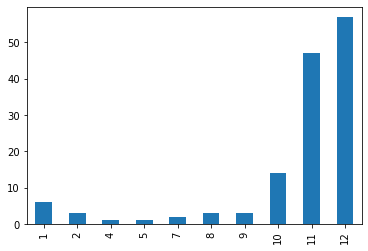

In [192]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:title={'center':'Freq of the # of movies with "Summer" release in the USA'}, xlabel='Months', ylabel='No. of movies'>

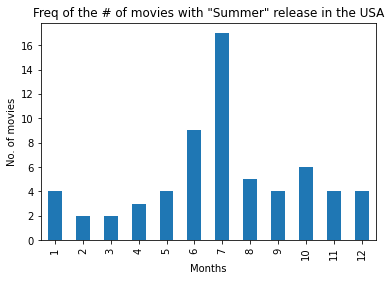

In [199]:
summer = release_dates[(release_dates['title'].str.contains('Summer')) & (release_dates['country'] == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar' , xlabel = 'Months', ylabel='No. of movies'\
                                                      ,title='Freq of the # of movies with "Summer" release in the USA')


### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

<AxesSubplot:title={'center':'Freq of the # of movies with "Action" release in the USA'}, xlabel='Weeks', ylabel='No. of movies'>

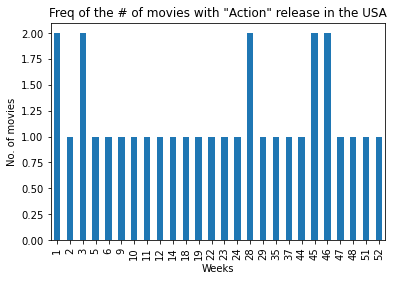

In [204]:
action = release_dates[(release_dates['title'].str.contains('Action')) & (release_dates['country'] == 'USA')]
action.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar' , xlabel = 'Weeks', ylabel='No. of movies'\
                                                      ,title='Freq of the # of movies with "Action" release in the USA')


### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [241]:
k= keanu_lead[keanu_lead['n']==1.0]

keanu_release_usa = pd.merge(k , release_dates , how='left', on= ['title', 'year'])

print("All the movies in which Keanu Reeves has played the lead role along with their release date\
 in the USA sorted by the date of release :")
k_usa = keanu_release_usa[keanu_release_usa['country']== 'USA'].sort_values('date')

print(k_usa[['title' , 'date' , 'country']])

All the movies in which Keanu Reeves has played the lead role along with their release date in the USA sorted by the date of release :
                                title       date country
715                  The Night Before 1988-04-15     USA
78   Bill & Ted's Excellent Adventure 1989-02-17     USA
69         Bill & Ted's Bogus Journey 1991-07-19     USA
433                     Little Buddha 1994-05-25     USA
442                             Speed 1994-06-10     USA
371                   Johnny Mnemonic 1995-05-26     USA
49               A Walk in the Clouds 1995-08-11     USA
91                     Chain Reaction 1996-08-02     USA
190                 Feeling Minnesota 1996-09-13     USA
594              The Devil's Advocate 1997-10-17     USA
672                        The Matrix 1999-03-31     USA
716                  The Replacements 2000-08-11     USA
511                    Sweet November 2001-02-16     USA
205                         Hard Ball 2001-09-14     USA
150       

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:title={'center':'Months in which movies with Keanu Reeves tend to be released in the USA'}, xlabel='Months', ylabel='No. of movies'>

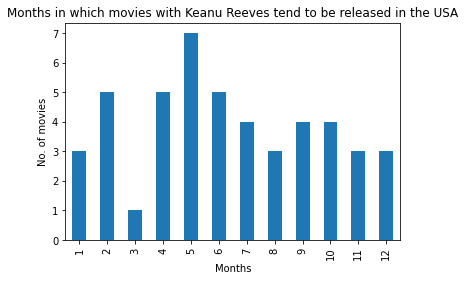

In [254]:
k_months = pd.merge(keanu_r , release_dates , how='left', on= ['title', 'year'])
k_months_usa = k_months[k_months['country']== 'USA']
k_months_usa.date.dt.month.value_counts().sort_index().plot(kind='bar' , xlabel = 'Months', ylabel='No. of movies'\
                                                           ,title ='Months in which movies with Keanu Reeves tend to be released in the USA') 

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:title={'center':'Years in which movies with Ian McKellen tend to be released in the USA'}, xlabel='Years', ylabel='No. of movies'>

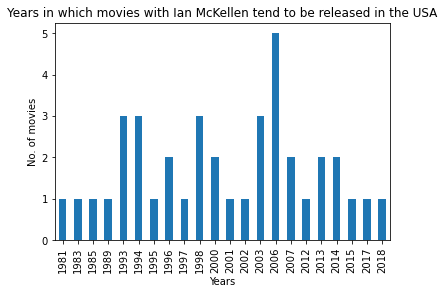

In [260]:
ian_m = cast[cast['name'].str.contains('Ian McKellen', case = False)]
ian_years = pd.merge(ian_m, release_dates , how='left', on= ['title', 'year'])

ian_years_usa = ian_years[ian_years['country']== 'USA']
ian_years_usa.date.dt.year.value_counts().sort_index().plot(kind='bar' , xlabel = 'Years', ylabel='No. of movies'\
                                                           ,title ='Years in which movies with Ian McKellen tend to be released in the USA')

In [269]:
ian_years_usa.sort_values('year', ascending = False)

,title,year,name,type,character,n,country,date
19,Animal Crackers,2017,Ian McKellen,actor,Horatio P. Huntington,4.0,USA,2018-05-04
96,Beauty and the Beast,2017,Ian McKellen,actor,Cogsworth,11.0,USA,2017-03-17
233,Mr. Holmes,2015,Ian McKellen,actor,Sherlock Holmes,1.0,USA,2015-07-24
629,The Hobbit: The Battle of the Five Armies,2014,Ian McKellen,actor,Gandalf,1.0,USA,2014-12-17
1196,X-Men: Days of Future Past,2014,Ian McKellen,actor,Magneto,18.0,USA,2014-05-23
1009,The Wolverine,2013,Ian McKellen,actor,Magneto,NaN,USA,2013-07-26
699,The Hobbit: The Desolation of Smaug,2013,Ian McKellen,actor,Gandalf,1.0,USA,2013-12-13
564,The Hobbit: An Unexpected Journey,2012,Ian McKellen,actor,Gandalf,1.0,USA,2012-12-14
332,Stardust,2007,Ian McKellen,actor,Narrator,1.0,USA,2007-08-10
488,The Golden Compass,2007,Ian McKellen,actor,Iorek Byrnison,6.0,USA,2007-12-07
